In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(estimator=base_estimator, random_state=42)

bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [5]:
y_pred = bagging_classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the bagging classifier: {accuracy:.4f}")

Accuracy of the bagging classifier: 0.9722


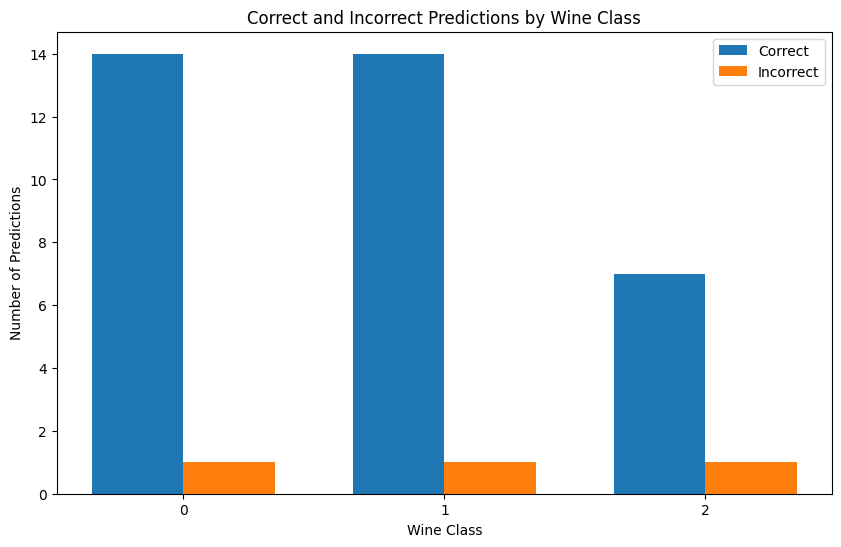

In [8]:
import pandas as pd

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

correct_counts = correct_predictions['Actual'].value_counts().sort_index()
incorrect_counts = incorrect_predictions['Actual'].value_counts().sort_index()

labels = sorted(list(set(y_test)))
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, correct_counts, width, label='Correct')
rects2 = ax.bar(x + width/2, incorrect_counts, width, label='Incorrect')

ax.set_xlabel('Wine Class')
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct and Incorrect Predictions by Wine Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()